# Limiting Behavior of the BID Lattice

In [16]:
#Required packages
using EvolutionaryModels
using DifferentialEquations
using Plots
using LaTeXStrings
using Catalyst
using Latexify

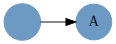

In [59]:
##################### Pure Immigration
k_i = (2.8)
N_0 = 0
t = 18

complexgraph(EvolutionaryModels.pure_immigration)

In [18]:
deficiency(EvolutionaryModels.pure_immigration)

0

In [19]:
odesys = convert(ODESystem, EvolutionaryModels.pure_immigration)

Model ##ReactionSystem#291 with 1 equations
States (1):
  A(t)
Parameters (1):
  K_i

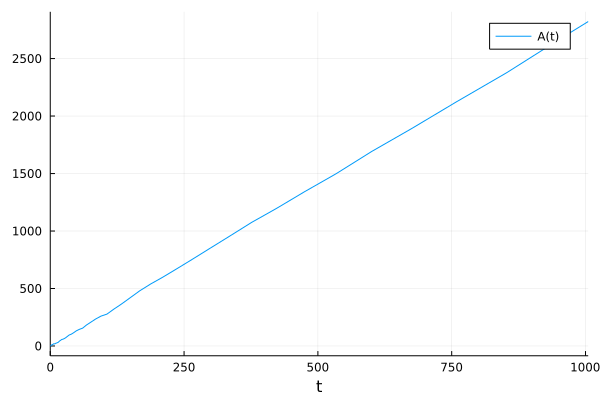

In [69]:
 # SDEProblem for CLE
sprob = SDEProblem( EvolutionaryModels.pure_immigration,u0, tspan, p)

# solve and plot, tstops is used to specify enough points
# that the plot looks well-resolved
sol = solve(sprob, LambaEM(), tstops=range(0., step=4e-3, length=1001))
plot(sol)

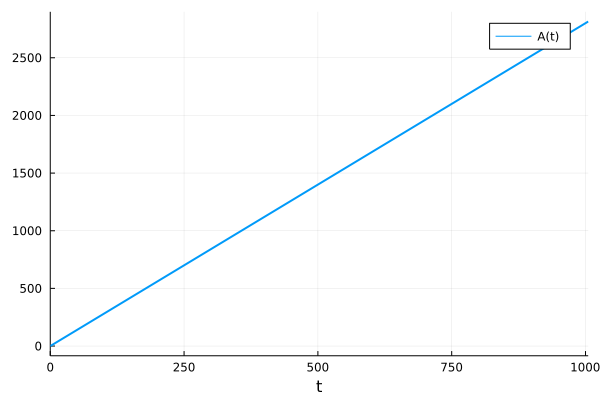

In [68]:
using OrdinaryDiffEq
p     = [:K_i => 2.8]
tspan = (0.0,1005.0)
u0    = [:A => 0]
op    = ODEProblem(EvolutionaryModels.pure_immigration, u0, tspan, p)
sol   = solve(op, Tsit5())       # use Tsit5 ODE solver
plot(sol, lw=2)

In [55]:
bdp = @reaction_network begin
  c₁, X --> 2X
  c₂, X --> 0
  c₃, 0 --> X
end c₁ c₂ c₃
p = (:c₁ => 2.0, :c₂ => 1.0, :c₃ => 50.)
u₀ = [:X => 0.]
tspan = (0.,2.)


(0.0, 2.0)

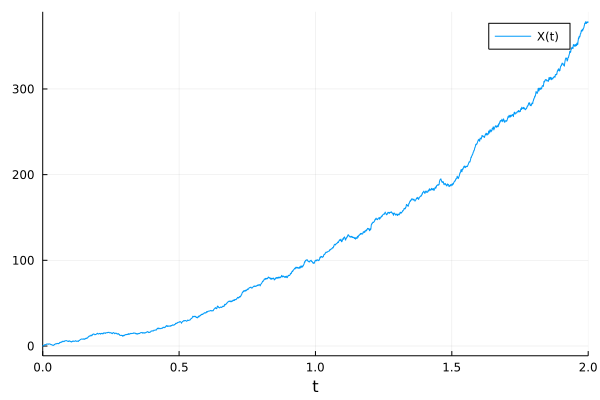

In [56]:
# SDEProblem for CLE
sprob = SDEProblem(bdp, u₀, tspan, p)

# solve and plot, tstops is used to specify enough points
# that the plot looks well-resolved
sol = solve(sprob, LambaEM(), tstops=range(0., step=4e-3, length=1001))
plot(sol)